In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random
X=loadmat("mnist.mat")
data_train=X['trainX']
data_label=X['trainY'][0] 
test_train=X['testX']
test_label=X['testY'][0]

In [109]:
# This code assigns random labels to each image

def labels_assignment(training_set,k):  
    num_rows, num_cols=training_set.shape
    random_labels_list=[0]*num_rows
    for i in range(num_rows):
        r=random.randint(0,k-1)
        random_labels_list[i]=r
    return random_labels_list
random_labels=labels_assignment(data_train,20)
print(random_labels)

[1, 7, 15, 5, 4, 6, 12, 0, 0, 15, 18, 13, 19, 12, 10, 16, 6, 15, 16, 18, 16, 4, 10, 10, 7, 16, 15, 12, 2, 13, 7, 7, 12, 1, 17, 2, 10, 10, 8, 19, 18, 19, 9, 17, 7, 19, 13, 11, 13, 18, 16, 10, 13, 9, 9, 5, 18, 17, 10, 9, 14, 7, 4, 8, 15, 16, 17, 17, 8, 0, 11, 19, 14, 10, 13, 10, 18, 16, 9, 18, 16, 14, 9, 4, 19, 11, 7, 11, 8, 7, 13, 17, 12, 1, 6, 6, 8, 9, 10, 17, 17, 19, 13, 4, 16, 7, 5, 14, 13, 3, 13, 8, 2, 15, 19, 5, 15, 6, 19, 10, 18, 15, 11, 10, 4, 13, 2, 16, 0, 1, 13, 19, 5, 12, 0, 13, 6, 0, 7, 13, 19, 17, 19, 7, 7, 2, 10, 16, 17, 12, 16, 10, 13, 1, 10, 14, 15, 16, 7, 19, 17, 3, 7, 0, 7, 10, 1, 11, 15, 11, 15, 17, 6, 18, 11, 0, 1, 19, 2, 15, 16, 8, 1, 2, 1, 3, 8, 5, 13, 2, 0, 8, 14, 8, 4, 7, 9, 19, 10, 12, 18, 3, 5, 0, 16, 11, 8, 10, 2, 4, 13, 1, 0, 8, 14, 14, 12, 11, 3, 1, 10, 11, 11, 9, 8, 11, 6, 11, 0, 2, 3, 6, 2, 9, 2, 10, 18, 5, 5, 19, 17, 7, 19, 15, 1, 12, 4, 16, 18, 8, 10, 8, 4, 4, 8, 13, 4, 18, 19, 9, 3, 10, 10, 13, 7, 16, 3, 1, 4, 6, 0, 7, 5, 17, 16, 2, 10, 17, 1, 18, 14, 18

In [113]:
#This function derives the mean image from each of the images in its cluster

def Mean_Calculator(training_set,k,labels):
    num_rows, num_cols=training_set.shape
    Means_List=np.zeros((k,num_cols))
    labels_counter=[0]*k
    for i in range(num_rows):
        temp_vector=training_set[i][:]
        temp_label=labels[i]
        Means_List[temp_label][:]=Means_List[temp_label][:]+training_set[i][:]
        labels_counter[temp_label]=labels_counter[temp_label]+1
    for j in range(k):
        entries=labels_counter[j]
        Means_List[j][:]=Means_List[j][:]/entries
        #print('entries in', j, 'are', entries)
    return Means_List
random_means=Mean_Calculator(data_train,20,random_labels)   
#print(random_means)

In [114]:
#This function calculates the j clust 
def J_Cluster_Calculator(training_set,k,labels,means):
    jclust=0
    temp_norm=0
    num_rows, num_cols=training_set.shape
    for i in range(num_rows):
        temp_label=labels[i]
        temp_mean=means[temp_label][:]
        temp_vector=training_set[i][:]
        inside=temp_vector-temp_mean
        temp_norm=temp_norm+np.linalg.norm(inside)
    temp_norm=temp_norm/num_rows
    return temp_norm
jclusttest=J_Cluster_Calculator(data_train,20,random_labels,random_means)
print(jclusttest)
        

1834.2778440583063


In [116]:
#This function reclusters all of the images to its closest mean vector
           
        
        

In [117]:
#This function reclusters all of the images to its closest mean vector


def Recluster(training_set,k,labels_list,means_list):
    temp_label=0
    Jclust_calc=0
    temp_jclust=0
    temp_norm_value=0
    num_rows, num_cols=training_set.shape
    for vec in range(num_rows):
        for label in range(k):
            temp_label=label
            mean_we_want=means_list[label][:]
            vector_we_want=training_set[vec][:]   #I recluster every single datapoint
            inside=mean_we_want-vector_we_want
            temp_jclust=np.linalg.norm(inside)
            if(label==0):
                jclust_calc=temp_jclust
                labels_list[vec]=label
            if(temp_jclust<jclust_calc):
                jclust_calc=temp_jclust
                labels_list[vec]=label
    return labels_list
Reclustered_one=Recluster(data_train,20,random_labels,random_means)
print(Reclustered_one)

[5, 8, 7, 17, 0, 11, 12, 19, 12, 17, 2, 17, 12, 11, 12, 0, 2, 13, 1, 0, 18, 8, 0, 17, 14, 5, 2, 5, 5, 0, 12, 16, 7, 13, 5, 17, 1, 19, 2, 11, 0, 5, 6, 0, 12, 2, 2, 17, 12, 19, 12, 5, 10, 0, 7, 18, 5, 0, 2, 3, 11, 17, 5, 19, 7, 17, 19, 12, 8, 5, 12, 0, 0, 4, 12, 19, 12, 12, 0, 9, 18, 5, 18, 14, 2, 13, 3, 11, 8, 7, 11, 0, 7, 14, 13, 19, 0, 13, 12, 3, 12, 10, 12, 0, 12, 12, 5, 18, 8, 14, 2, 11, 0, 3, 5, 7, 7, 5, 5, 9, 18, 5, 17, 13, 0, 5, 1, 17, 12, 5, 12, 7, 12, 0, 12, 19, 12, 16, 5, 0, 0, 9, 7, 6, 2, 0, 13, 4, 0, 16, 0, 11, 12, 0, 10, 11, 5, 19, 7, 11, 2, 5, 2, 0, 7, 11, 0, 7, 0, 19, 2, 18, 7, 17, 12, 17, 2, 9, 8, 19, 12, 5, 5, 2, 12, 10, 1, 14, 18, 14, 1, 17, 18, 10, 7, 13, 7, 13, 12, 11, 12, 17, 19, 19, 4, 3, 5, 11, 0, 8, 8, 12, 1, 18, 2, 9, 18, 7, 1, 19, 8, 18, 11, 13, 9, 4, 2, 2, 12, 8, 6, 12, 7, 17, 18, 9, 9, 7, 7, 13, 12, 18, 18, 7, 5, 5, 3, 2, 12, 8, 16, 0, 12, 11, 9, 19, 12, 7, 2, 13, 6, 11, 14, 7, 2, 5, 3, 2, 6, 12, 12, 0, 7, 9, 12, 7, 12, 11, 14, 2, 0, 18, 7, 5, 16, 2, 5, 13, 2

In [100]:
# This combines all the pieces together and runs the parent function depending on k and run times
def Cluster_Complete(training_set,k,run_times):
        randomized_labels=labels_assignment(training_set,k)
        print('Done',0)
        mean_list=Mean_Calculator(training_set,k,randomized_labels)
        print('Done',0)
        JClusts=J_Cluster_Calculator(training_set,k,randomized_labels,mean_list)
        print('JClusts are', JClusts)
        print('Done',0)
        Recluster_Step=Recluster(training_set,k,randomized_labels,mean_list)
        print('Done',0)
        for i in range(run_times-1):
            indexing_mistake=i+1
            mean_list=Mean_Calculator(training_set,k,randomized_labels)
            print('Done',i)
            JClusts=J_Cluster_Calculator(training_set,k,randomized_labels,mean_list)
            print('JClusts are', JClusts)
            print('Done',i)
            Recluster_Step=Recluster(training_set,k,randomized_labels,mean_list)
            print('Done',i)
        return Recluster_Step
Thirty=Cluster_Complete(data_train,5,10)
print(Thirty)

Done 0
Done 0
JClusts are 1834.537821854412
Done 0
Done 0
Done 0
JClusts are 1752.5990466414958
Done 0
Done 0
Done 1
JClusts are 1700.4518300711984
Done 1
Done 1
Done 2
JClusts are 1681.142331573782
Done 2
Done 2
Done 3
JClusts are 1674.4789762002881
Done 3
Done 3
Done 4
JClusts are 1671.7422328445348
Done 4
Done 4
Done 5
JClusts are 1670.241489643234
Done 5
Done 5
Done 6
JClusts are 1669.40695496163
Done 6
Done 6
Done 7
JClusts are 1668.9249037498143
Done 7
Done 7
Done 8
JClusts are 1668.5852586770372
Done 8
Done 8
[0, 2, 1, 4, 1, 3, 4, 0, 4, 3, 0, 4, 0, 3, 4, 3, 3, 3, 4, 3, 1, 2, 3, 4, 4, 0, 1, 0, 0, 4, 1, 3, 1, 3, 3, 4, 0, 2, 1, 3, 4, 3, 4, 3, 4, 1, 0, 3, 0, 0, 0, 2, 1, 4, 1, 3, 2, 3, 1, 4, 1, 4, 0, 2, 2, 4, 3, 4, 0, 0, 4, 3, 4, 3, 0, 2, 0, 4, 4, 3, 0, 2, 2, 2, 1, 3, 0, 3, 2, 3, 2, 3, 1, 3, 3, 2, 3, 3, 0, 4, 3, 1, 4, 3, 4, 4, 0, 0, 2, 1, 1, 0, 4, 4, 2, 3, 1, 2, 2, 2, 0, 2, 4, 3, 4, 3, 0, 3, 4, 3, 0, 3, 4, 3, 1, 0, 0, 3, 0, 3, 4, 3, 1, 1, 0, 4, 3, 3, 3, 0, 4, 3, 4, 3, 1, 3, 2, 0, 1, 

(5, 784)


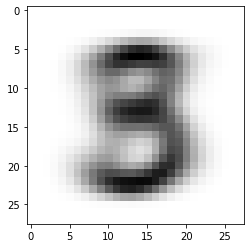

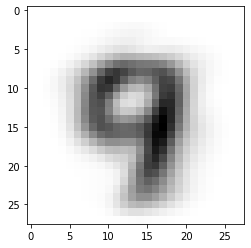

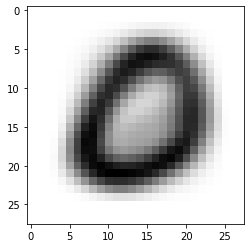

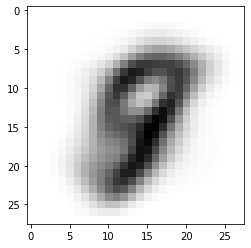

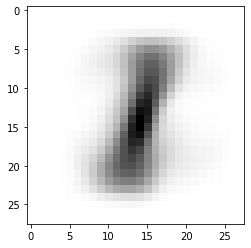

In [101]:
# Thirty are the new labels after clustering btw
#This just shows all the means 
means_graph=Mean_Calculator(data_train,5,Thirty) #gives me all twenty means 2d matrix k x 784
print(means_graph.shape)
#plt.figure()
#plt.imshow(means_graph[0][:].reshape(28,28),cmap='binary')
#plt.imshow(data_train[19][:].reshape(28,28),cmap='binary')
#means_counter_graph=0
for i in range(5):
        plt.figure()
        plt.imshow(means_graph[i][:].reshape(28,28),cmap='binary')


In [106]:
means_graph=Mean_Calculator(data_train,5,Thirty) #gives me all twenty means 2d matrix k x 784
#This calculates the 10 closest vectors to the mean
def Closest_Vectors(training_set,k,label,label_set,mean_set):
    num_rows, num_cols=training_set.shape
    temp_mean=mean_set[label][:]
    temp_vector=data_train[0][:]
    inside=temp_vector-temp_mean
    closest_norm=np.linalg.norm(inside)/num_rows
    closest_vectors=[None]*10
    duplicate_list=[None]*10
    for j in range(10):
        for i in range(60000):
            if label_set[i]==label:
                if (i not in duplicate_list):
                    if(i==7109):
                        print(j)
                    temp_vector=data_train[i][:]
                    inside=temp_vector-temp_mean
                    temp_norm=np.linalg.norm(inside)/num_rows
                    if(temp_norm<closest_norm and i not in duplicate_list):
                        closest_vectors[j]=i
                        closest_norm=temp_norm
                        duplicate_list[j]=i
 
        temp_vector=data_train[0][:]
        inside=temp_vector-temp_mean
        closest_norm=np.linalg.norm(inside)/num_rows            
    print(closest_vectors)
    return closest_vectors
Project=Closest_Vectors(data_train,5,3,Thirty,means_graph)   
# keeps spitting out the last couple of vectors

0
1
2
3
4
5
6
7
8
9
[423, 23998, 319, 31336, 409, 27304, 11215, 36521, 47091, 11225]


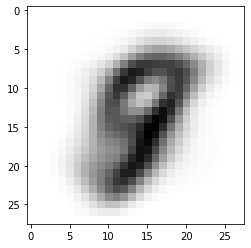

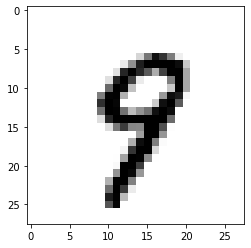

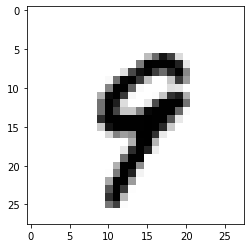

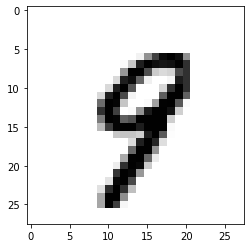

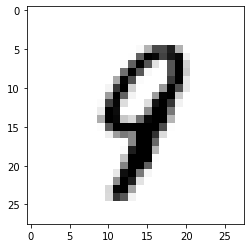

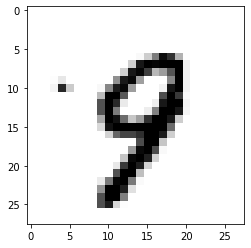

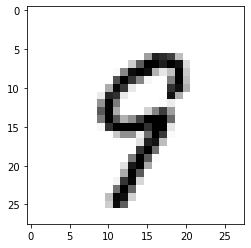

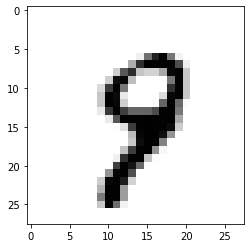

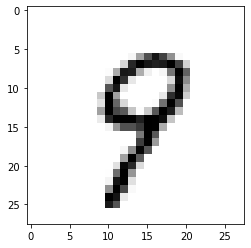

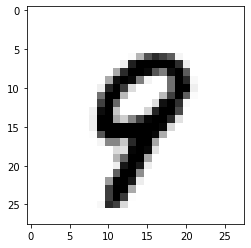

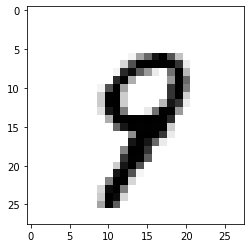

In [107]:
#Prints the mean and the ten closest vectors
plt.figure()
Image_One=Project[0]
Image_Two=Project[1]
Image_Three=Project[2]
Image_Four=Project[3]
Image_Five=Project[4]
Image_Six=Project[5]
Image_Seven=Project[6]
Image_Eight=Project[7]
Image_Nine=Project[8]
Image_Ten=Project[9]
plt.imshow(means_graph[3][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_One][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Two][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Three][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Four][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Five][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Six][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Seven][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Eight][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Nine][:].reshape(28,28),cmap='binary')
plt.figure()
plt.imshow(data_train[Image_Ten][:].reshape(28,28),cmap='binary')

In [3]:
plt.imshow(means_graph[0][:].reshape(28,28),cmap='binary')

NameError: name 'plt' is not defined